<div class="alert alert-block alert-success">

<b>Comentário do Tutor v2</b> <a class="tocSkip"></a>
    

- Excelente. Ficou muito bom! 
</div>

# Projeto E-Commerce: Identificando os perfis dos consumidores

**Link PDF:** https://docs.google.com/presentation/d/1la4J2k_F4D7oscOZigZq1U1gspY3l4ACCFDeg5dFsjQ/edit?usp=sharing

**Link Tableau:**

https://public.tableau.com/views/E-CommerceIdentificarosperfisdosconsumidores1/Painel1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

https://public.tableau.com/views/E-CommerceIdentificarosperfisdosconsumidores/Painel12?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

Pandas:
https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1, 
Como toda base do projeto é em pandas eu utilizei esse artigo como referência para relembrar funções essenciais que eu havia esquecido. 

Análise RFM:
https://edrone.me/pt/blog/analise-de-rfm-para-e-commerce)  
https://medium.com/@larixgomex/segmenta%C3%A7%C3%A3o-de-clientes-com-rfm-em-python-3a97e534ffa1).  
Esses artigos me ajudaram a aplicar o conceito de RFM na prática, o que me deu uma visão melhor do perfil dos clientes. Foi a primeira vez que utilizei RFM e acabei assistindo uns videos no youtube também pra conseguir aplicar. 

Seaborn:
https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp   
https://www.geeksforgeeks.org/introduction-to-seaborn-python/.  

Me ajudou a criar graficos visualmente  melhores principalmente pra entender melhor sobre a distribuição.

Gráficos:
https://estatisticafacil.org/2020/10/07/grafico-metodo-simples/
https://infoslack.pro/ml-book/contents/matplotlib-plots.html
https://mybinder.org/v2/gh/matplotlib/mpl-brochure-binder/main?labpath=MatplotlibExample.ipynb  
Esses artigos me ajudaram na decisão de quais gráficos escolher na hora de representar os dados, principalmente por ser algo que eu tenho uma certa dificuldade na escolha.

EDA (Análise Exploratória de Dados):
https://medium.com/@barross.gleice/explicando-para-aprender-exploratory-data-analysis-eda-an%C3%A1lise-explorat%C3%B3ria-de-dados-3d31d14424bb   
https://www.aprendadatascience.com/blog/an%C3%A1lise-explorat%C3%B3ria-de-dados/fundamentos-de-eda

Foi muito util na hora de escolher o passa a passo da analise exploratória, como a plataforma do curso não tem mais a opção de busca, neste artigo pude tirar algumas dúvidas e relembrar algumas funções na hora de fazer a a análise.

Merge:
https://1fabiana-souza.medium.com/juntando-dados-com-o-m%C3%A9todo-merge-ea3dbb6b80a5
O uso da função merge foi muito útil na hora de  cruzar e analisar as quantidades positivas e negativas de transações de clientes. me permitiu responder perguntas  sobre devoluções e quantidades vendidas, garantindo uma análise precisa e detalhada dos dados.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import pearsonr
# Configurações para os gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Análise Exploratória de Dados

**Carregando os dados**

In [4]:
# Carregando o dataset usando tabulação como delimitador
data = pd.read_csv(r'C:\Users\natan\Desktop\Tripleten\Projeto E Commerce Identificar os perfis dos consumidores\ecommerce_dataset_us.csv', delimiter='\t')

# Exibindo as primeiras linhas do dataset
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


**Resumo estatístico**

In [6]:
# Obtendo o resumo estatístico do dataset
print("\nResumo estatístico do dataset:")
print(data.describe(include='all'))



Resumo estatístico do dataset:
       InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000

**Valores ausentes**

In [7]:
# Verificaando valores ausentes
missing_values = data.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

# Verificando a porcentagem de valores ausentes em cada coluna
missing_percentage = (missing_values / len(data)) * 100
print("\nPorcentagem de valores ausentes por coluna:")
print(missing_percentage)

Valores ausentes por coluna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

Porcentagem de valores ausentes por coluna:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
dtype: float64


**Distribuição das Quantidades**

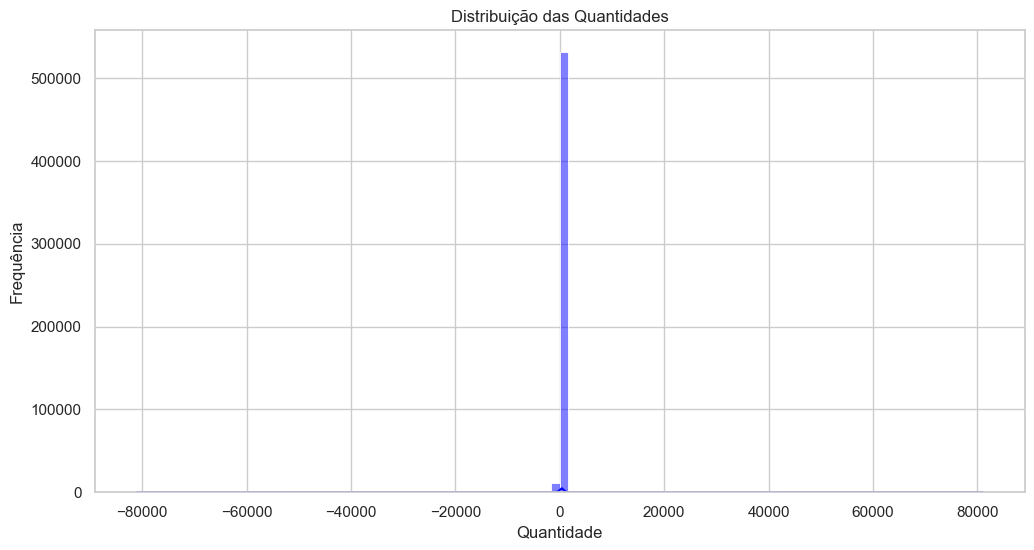

Distribuição das Quantidades:
count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64


In [8]:
plt.figure(figsize=(12, 6))
quantity_hist = sns.histplot(data['Quantity'], bins=100, kde=True, color='blue')
plt.title('Distribuição das Quantidades')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()


# Printar informações da distribuição de Quantidade
print("Distribuição das Quantidades:")
print(data['Quantity'].describe())

*A maioria das transações envolve poucas unidades, mas algumas têm quantidades muito grandes e variáveis.*

**Quantidades negativas**


In [9]:
# número de transações com quantidades negativas
negative_quantities = data[data['Quantity'] < 0]
print(f"Número de transações com quantidades negativas: {negative_quantities.shape[0]}")


Número de transações com quantidades negativas: 10624


In [10]:
# filtrand transações com quantidades positivas e negativas
positive_transactions = data[data['Quantity'] > 0].copy()
negative_transactions = data[data['Quantity'] < 0].copy()

# colunas relevantes
positive_transactions = positive_transactions[['CustomerID', 'StockCode', 'Description', 'Quantity', 'InvoiceNo', 'InvoiceDate']]
positive_transactions.rename(columns={'Description': 'Description_positive', 'Quantity': 'Quantity_positive',
                                      'InvoiceNo': 'InvoiceNo_positive', 'InvoiceDate': 'InvoiceDate_positive'}, inplace=True)

negative_transactions = negative_transactions[['CustomerID', 'StockCode', 'Description', 'Quantity', 'InvoiceNo', 'InvoiceDate']]
negative_transactions.rename(columns={'Description': 'Description_negative', 'Quantity': 'Quantity_negative',
                                      'InvoiceNo': 'InvoiceNo_negative', 'InvoiceDate': 'InvoiceDate_negative'}, inplace=True)

# combinando transaçõe positivas e negativas
combined_transactions = pd.merge(
    positive_transactions,
    negative_transactions,
    on=['CustomerID', 'StockCode']
)

# calculando a soma das quantidades compradas e devolvias 
summary = combined_transactions.groupby(['CustomerID', 'StockCode']).agg({
    'Quantity_positive': 'sum',
    'Quantity_negative': 'sum',
    'InvoiceDate_positive': 'min',
    'InvoiceDate_negative': 'min'
}).reset_index()

# relaçao entre quantidades positivas e negativas
summary['Quantity_match'] = summary['Quantity_positive'] + summary['Quantity_negative']


**Transações onde o cliente comprou e devolveu o mesmo produto:**

In [11]:
print("Transações onde o cliente comprou e devolveu o mesmo produto:")
print(combined_transactions)

Transações onde o cliente comprou e devolveu o mesmo produto:
       CustomerID StockCode                 Description_positive  \
0         17850.0     21730    GLASS STAR FROSTED T-LIGHT HOLDER   
1         17850.0     21730    GLASS STAR FROSTED T-LIGHT HOLDER   
2         17850.0     22632            HAND WARMER RED POLKA DOT   
3         13047.0     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS   
4         12583.0      POST                              POSTAGE   
...           ...       ...                                  ...   
78334     17581.0     23343         JUMBO BAG VINTAGE CHRISTMAS    
78335     15804.0     22178      VICTORIAN GLASS HANGING T-LIGHT   
78336     15804.0     84945   MULTI COLOUR SILVER T-LIGHT HOLDER   
78337     13113.0     22061  LARGE CAKE STAND  HANGING STRAWBERY   
78338     13113.0     22061  LARGE CAKE STAND  HANGING STRAWBERY   

       Quantity_positive InvoiceNo_positive InvoiceDate_positive  \
0                      6             536365     11/29

**Resumo das quantidades e intervalos entre compra e devolução:**

In [12]:
print("\nResumo das quantidades e intervalos entre compra e devolução:")
print(summary)


Resumo das quantidades e intervalos entre compra e devolução:
      CustomerID StockCode  Quantity_positive  Quantity_negative  \
0        12346.0     23166              74215             -74215   
1        12352.0     21914                 24                -24   
2        12352.0     22413                 12                -12   
3        12352.0     22645                 24                -24   
4        12352.0     22701                 12                -12   
...          ...       ...                ...                ...   
6974     18274.0     23245                  4                 -4   
6975     18274.0    84509A                  4                 -4   
6976     18274.0     84988                 12                -12   
6977     18276.0     23401                  4                 -2   
6978     18282.0     23187                 48                 -5   

     InvoiceDate_positive InvoiceDate_negative  Quantity_match  
0        01/16/2019 10:01     01/16/2019 10:17         

In [13]:
# Filtrando os itens com quantidade negativa (devoluções ou descarte)
negative_returns = data[data['Quantity'] < 0]

# Agrupando por descrição do item e somando as quantidades negativas (devoluções ou descarte)
item_return_summary = negative_returns.groupby('Description').agg({
    'Quantity': 'sum'
}).reset_index()

# Alterando o nome da coluna para 'Total_Quantity_negative'
item_return_summary.rename(columns={'Quantity': 'Total_Quantity_negative'}, inplace=True)

# Selecionando os 20 itens mais devolvidos ou descartados (sem converter para positivo)
top_20_items = item_return_summary.sort_values(by='Total_Quantity_negative', ascending=True).head(20)

print("Top 20 Itens Mais Devolvidos ou Descartados:")
print(top_20_items[['Description', 'Total_Quantity_negative']])


Top 20 Itens Mais Devolvidos ou Descartados:
                              Description  Total_Quantity_negative
1220          PAPER CRAFT , LITTLE BIRDIE                   -80995
1056       MEDIUM CERAMIC TOP STORAGE JAR                   -74494
2063         printing smudges/thrown away                   -19200
1842               Unsaleable, destroyed.                   -15644
2024                                check                   -13247
67                                      ?                    -9496
1497  ROTATING SILVER ANGELS T-LIGHT HLDR                    -9376
1355         Printing smudges/thrown away                    -9058
559                               Damaged                    -7540
2087                           throw away                    -5368
2033                              damages                    -4338
2047               incorrect stock entry.                    -4320
2088                          thrown away                    -4110
1126             

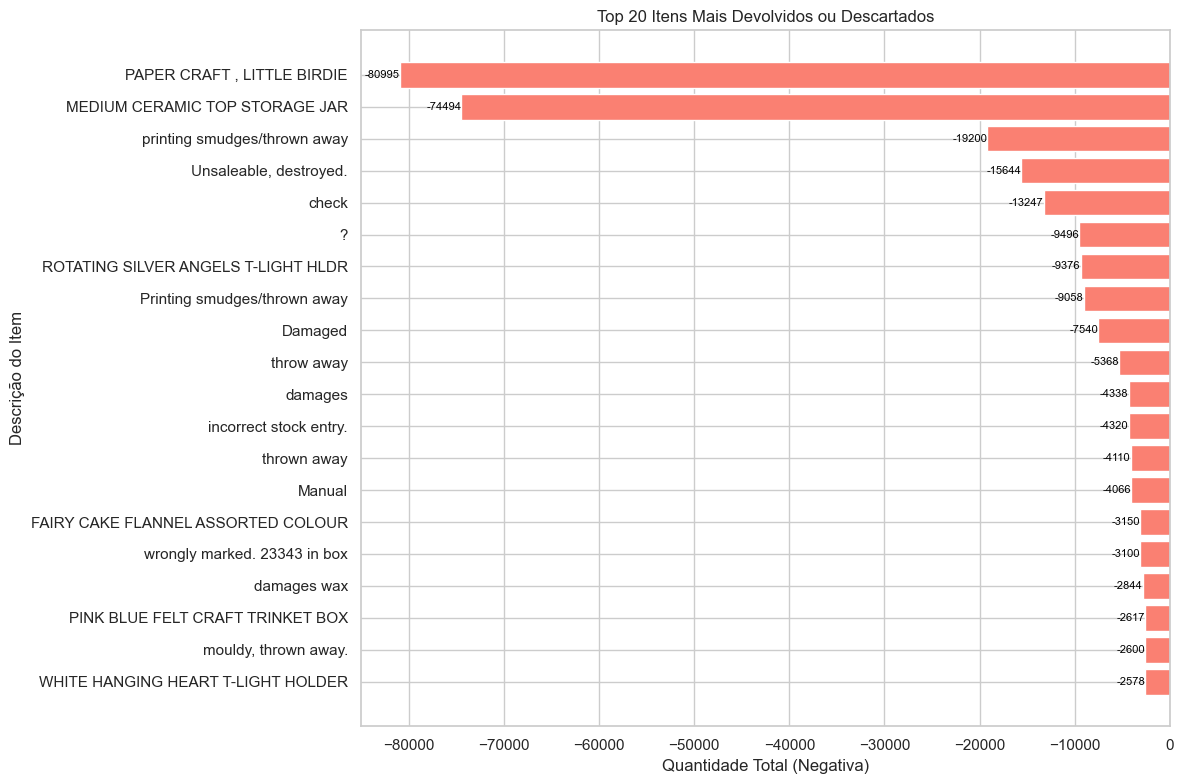

In [14]:
# Plotando os 20 itens mais devolvidos ou descartados
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_items['Description'], top_20_items['Total_Quantity_negative'], color='salmon')
plt.xlabel('Quantidade Total (Negativa)')
plt.ylabel('Descrição do Item')
plt.title('Top 20 Itens Mais Devolvidos ou Descartados')
plt.gca().invert_yaxis()  # Inverte a ordem para mostrar o maior no topo

# rótulos em cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width}', va='center', ha='right', color='black', fontsize=8)

plt.tight_layout()
plt.show()

**Os dados indicam:**  
**Produtos:** *Muitos produtos são comprados e devolvidos várias vezes, indicando que esses itens têm uma alta taxa de devolução.*  
**Clientes:** *Alguns clientes têm várias transações de compra e devolução para os mesmos produtos, sugerindo um comportamento de compra e devolução mais frequente.*  
**Data de Devolução:** *A maioria das devoluções ocorre dentro de um período curto após a compra, mas há também casos onde a devolução é feita muito tempo após a compra.*  
**Descartes e defeitos:** *Existe uma quantidade muito grande de produtos que foram descartados, com defeitos, destruidos e erros de entrada. *

**Distribuição dos Preços Unitários**

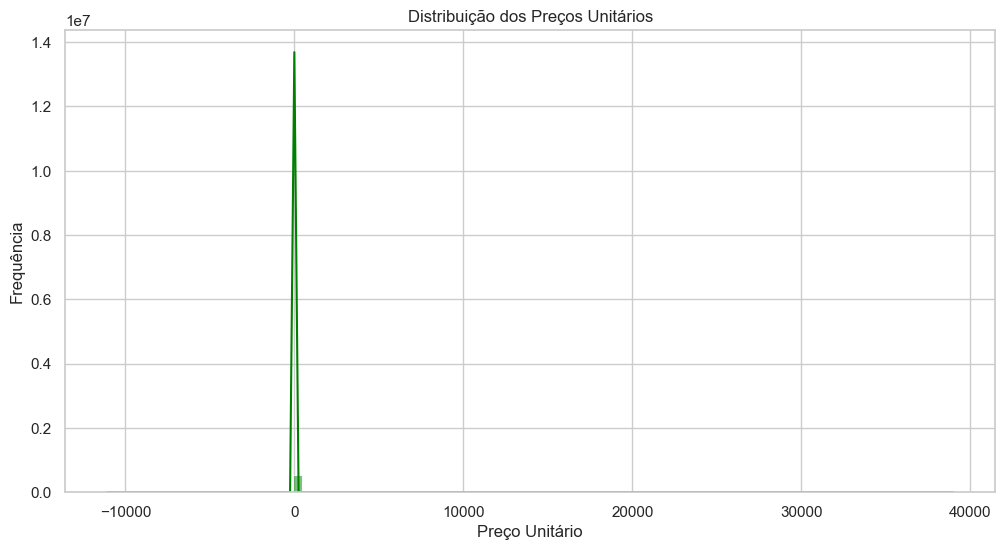


Distribuição dos Preços Unitários:
count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64


In [15]:
plt.figure(figsize=(12, 6))
price_hist = sns.histplot(data['UnitPrice'], bins=100, kde=True, color='green')
plt.title('Distribuição dos Preços Unitários')
plt.xlabel('Preço Unitário')
plt.ylabel('Frequência')
plt.show()

# Printar informações da distribuição de Preço Unitário
print("\nDistribuição dos Preços Unitários:")
print(data['UnitPrice'].describe())

*Esses dados indicam que, embora o preço médio seja relativamente baixo, há uma grande variabilidade nos preços, com alguns produtos tendo preços unitários muito altos ou negativos.*

**Distribuição das Transações por Data**

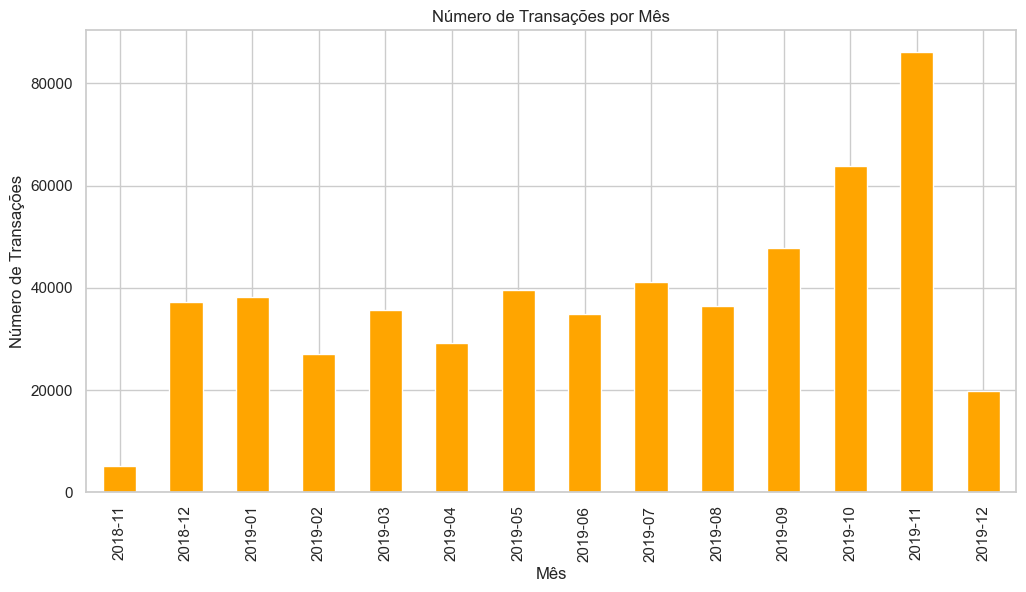


Número de Transações por Mês:
Month
2018-11     5217
2018-12    37264
2019-01    38132
2019-02    27018
2019-03    35713
2019-04    29107
2019-05    39622
2019-06    34857
2019-07    41060
2019-08    36496
2019-09    47874
2019-10    63731
2019-11    86074
2019-12    19744
Freq: M, dtype: int64


In [16]:
# Convertendo 'InvoiceDate' para datetime e extraindo o mês
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
data['Month'] = data['InvoiceDate'].dt.to_period('M')
monthly_transactions = data.groupby('Month').size()

plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='bar', color='orange')
plt.title('Número de Transações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Transações')
plt.xticks(rotation=90)
plt.show()

# Printar informações de transações por mês
print("\nNúmero de Transações por Mês:")
print(monthly_transactions)

*Observa-se um aumento significativo no número de transações a partir de outubro de 2019, atingindo um pico em novembro de 2019. Essa variação pode indicar campanhas promocionais, aumento da demanda ou sazonalidade no comportamento de compra dos clientes. O número de transações diminui novamente em dezembro de 2019, possivelmente refletindo a temporada de férias ou mudanças no comportamento dos consumidores.*

**Frequência dos Itens Comprados**

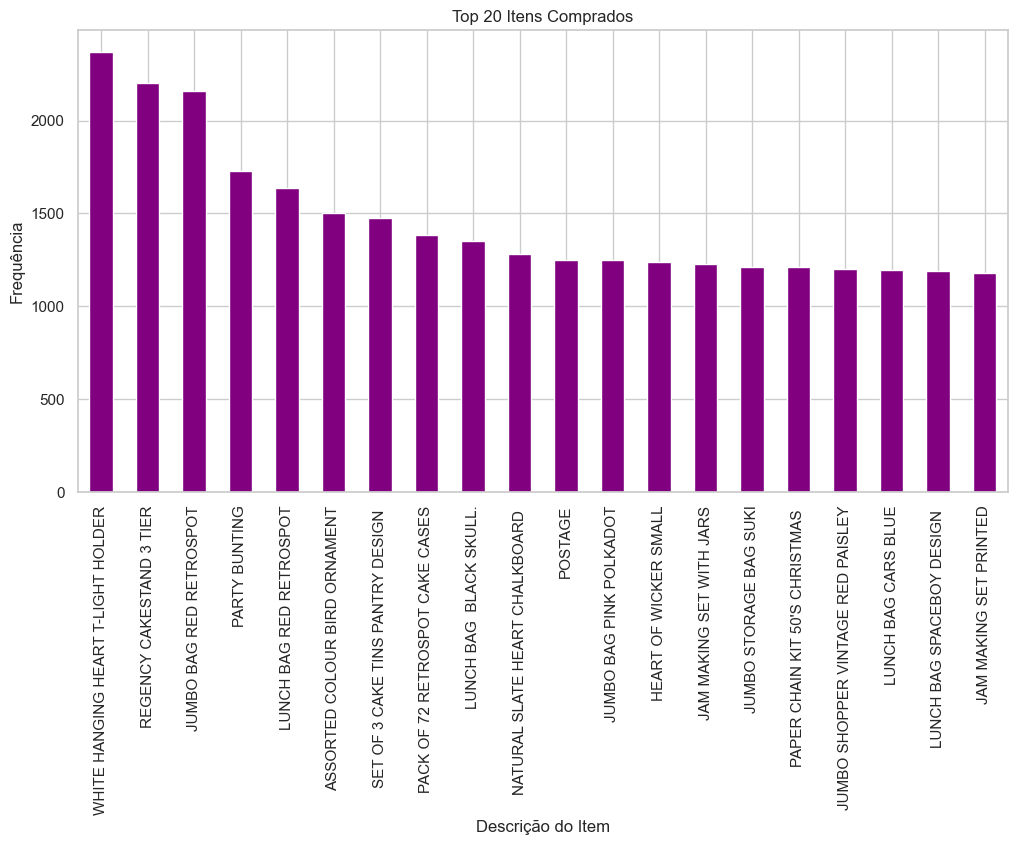


Top 20 Itens Comprados:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1251
HEART OF WICKER SMALL                 1237
JAM MAKING SET WITH JARS              1229
JUMBO STORAGE BAG SUKI                1214
PAPER CHAIN KIT 50'S CHRISTMAS        1210
JUMBO SHOPPER VINTAGE RED PAISLEY     1202
LUNCH BAG CARS BLUE                   1197
LUNCH BAG SPACEBOY DESIGN             1192
JAM MAKING SET PRINTED                1182
Name: count, dtype: int64


In [17]:
top_items = data['Description'].value_counts().head(20)

plt.figure(figsize=(12, 6))
top_items.plot(kind='bar', color='purple')
plt.title('Top 20 Itens Comprados')
plt.xlabel('Descrição do Item')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.show()

# Printar informações dos top 20 itens comprados
print("\nTop 20 Itens Comprados:")
print(top_items)

*Os dados mostram que os itens mais comprados são bolsas, itens para festas e utensílios de cozinha, o que sugere que a maioria das compras é feita por mulheres.*

**Distribuição das compras ao longo do tempo**

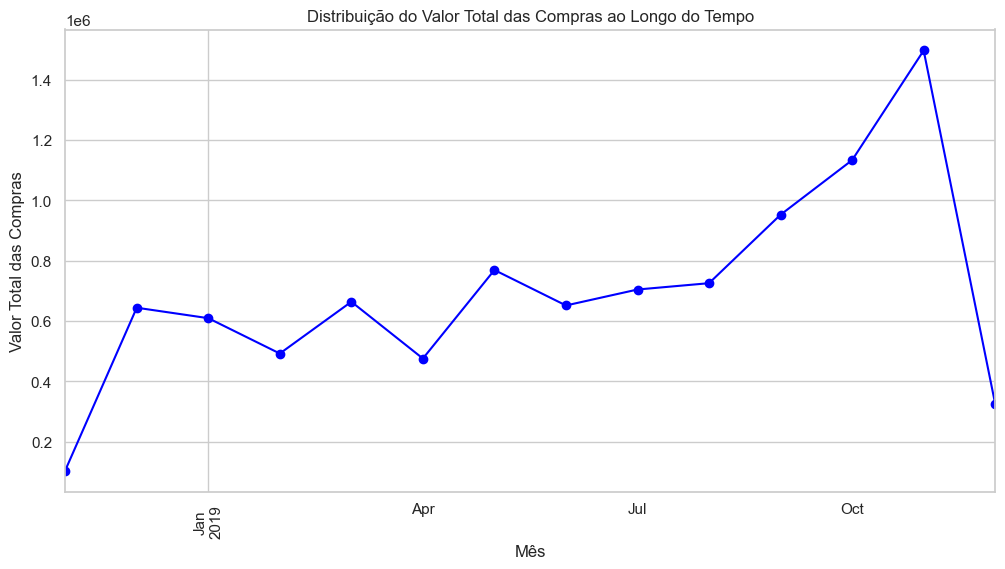

In [18]:
# Criando uma nova coluna 'TotalPrice' que representa o valor total de cada compra
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Agrupando os dados por mês e somando o valor total das compras
monthly_sales = data.groupby('Month')['TotalPrice'].sum()

# Plotando a distribuição das compras ao longo do tempo
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Distribuição do Valor Total das Compras ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Valor Total das Compras')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


**Correlação entre variáveis**

In [19]:
# Calcular a matriz de correlação
correlation_matrix = data.corr()

print("Matriz de Correlação:")
print(correlation_matrix)



ValueError: could not convert string to float: 'C536379'

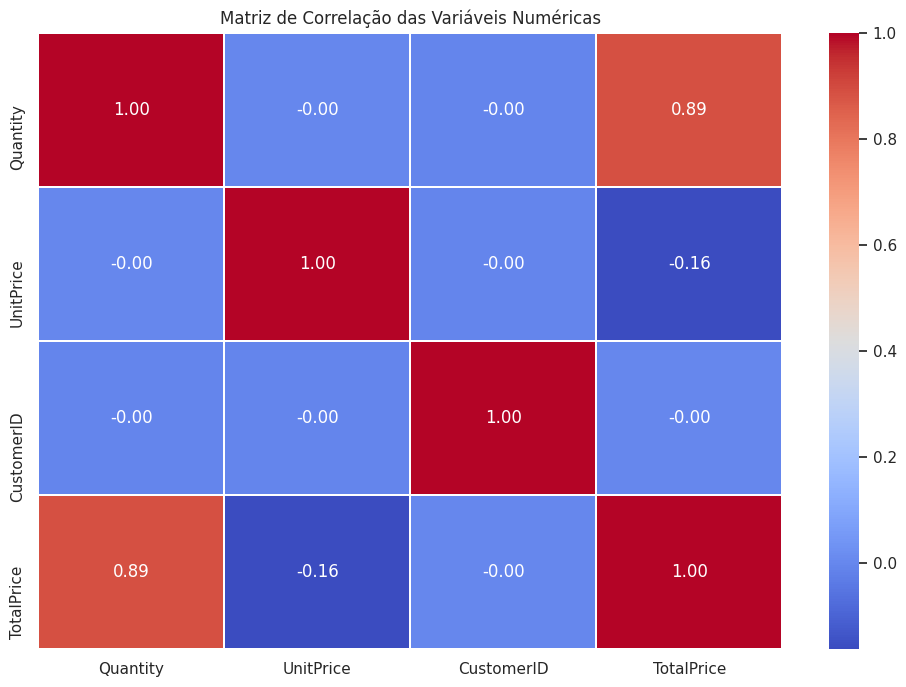

In [ ]:
# Mapa de calor
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()



*Esses valores sugerem que a quantidade total comprada tem a maior influência no gasto total, enquanto o preço unitário e o identificador do cliente têm pouca ou nenhuma relação com outras variáveis analisadas.*

# Segmentação de usuáios

**Valores NaN em CustomerID**

In [ ]:
# Remover linhas com valores NaN na coluna 'CustomerID'
data_clean = data.dropna(subset=['CustomerID']).copy()

**Agrupando compras por cliente**

In [ ]:
# Agrupar por 'CustomerID' e calcular a quantidade total vendida de cada item
item_quantity_per_customer = data_clean.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index()

print(item_quantity_per_customer.head())



   CustomerID                     Description  Quantity
0     12346.0  MEDIUM CERAMIC TOP STORAGE JAR         0
1     12347.0    3D DOG PICTURE PLAYING CARDS       126
2     12347.0        3D SHEET OF CAT STICKERS        12
3     12347.0        3D SHEET OF DOG STICKERS        12
4     12347.0     60 TEATIME FAIRY CAKE CASES        72


In [ ]:
# Somar as quantidades de itens comprados por cada CustomerID
total_quantity_per_customer = data_clean.groupby('CustomerID')['Quantity'].sum().reset_index()

print(total_quantity_per_customer)


      CustomerID  Quantity
0        12346.0         0
1        12347.0      2458
2        12348.0      2341
3        12349.0       631
4        12350.0       197
...          ...       ...
4367     18280.0        45
4368     18281.0        54
4369     18282.0        98
4370     18283.0      1397
4371     18287.0      1586

[4372 rows x 2 columns]


In [ ]:
# Calcular o gasto total de cada cliente
data_clean['TotalSpend'] = data_clean['Quantity'] * data_clean['UnitPrice']
total_spend_per_customer = data_clean.groupby('CustomerID')['TotalSpend'].sum().reset_index()

print(total_spend_per_customer.head())

   CustomerID  TotalSpend
0     12346.0        0.00
1     12347.0     4310.00
2     12348.0     1797.24
3     12349.0     1757.55
4     12350.0      334.40


In [ ]:
# Contar quantas compras cada cliente fez
purchase_count_per_customer = data_clean.groupby('CustomerID').size().reset_index(name='PurchaseCount')

print(purchase_count_per_customer.head())

   CustomerID  PurchaseCount
0     12346.0              2
1     12347.0            182
2     12348.0             31
3     12349.0             73
4     12350.0             17


**Padrões sazonais ou tendências nas datas das compras**

In [ ]:
# adicionar colunas adicionais para análise
data_clean['Ano_Mês'] = data_clean['InvoiceDate'].dt.to_period('M')
data_clean['Month'] = data_clean['InvoiceDate'].dt.to_period('M')
data_clean['Year'] = data_clean['InvoiceDate'].dt.year


In [ ]:
# agrupar por ano e mês e contar o número de transações
monthly_transactions = data_clean.groupby('Ano_Mês').size()
print("Número de Transações por Mês:")
print(monthly_transactions)

Número de Transações por Mês:
Ano_Mês
2018-11     4012
2018-12    22838
2019-01    24180
2019-02    20130
2019-03    26928
2019-04    22509
2019-05    30266
2019-06    26902
2019-07    28577
2019-08    28256
2019-09    39700
2019-10    52832
2019-11    66282
2019-12    13417
Freq: M, dtype: int64


*Essa variação ao longo do tempo sugere uma alta sazonalidade, com um grande volume de transações no final do ano, particularmente em novembro e outubro, e uma redução notável em dezembro.*

In [ ]:
# agrupar por ano e mês e somar o gasto total
data_clean['TotalSpend'] = data_clean['Quantity'] * data_clean['UnitPrice']
monthly_spend = data_clean.groupby('Ano_Mês')['TotalSpend'].sum()
print("\nGasto Total por Mês:")
print(monthly_spend)



Gasto Total por Mês:
Ano_Mês
2018-11      91826.690
2018-12     462777.330
2019-01     517832.540
2019-02     434829.260
2019-03     562237.380
2019-04     409698.471
2019-05     684053.250
2019-06     576932.380
2019-07     602282.901
2019-08     643654.230
2019-09     875995.672
2019-10    1029836.220
2019-11    1153501.780
2019-12     254607.710
Freq: M, Name: TotalSpend, dtype: float64


*Os dados mostram um padrão de aumento nos gastos, especialmente notável no final do ano, com picos em novembro e outubro. Dezembro, apesar de ser o mês de compras de fim de ano, mostra uma queda significativa, possivelmente devido à diminuição no número de transações após o pico de novembro.*

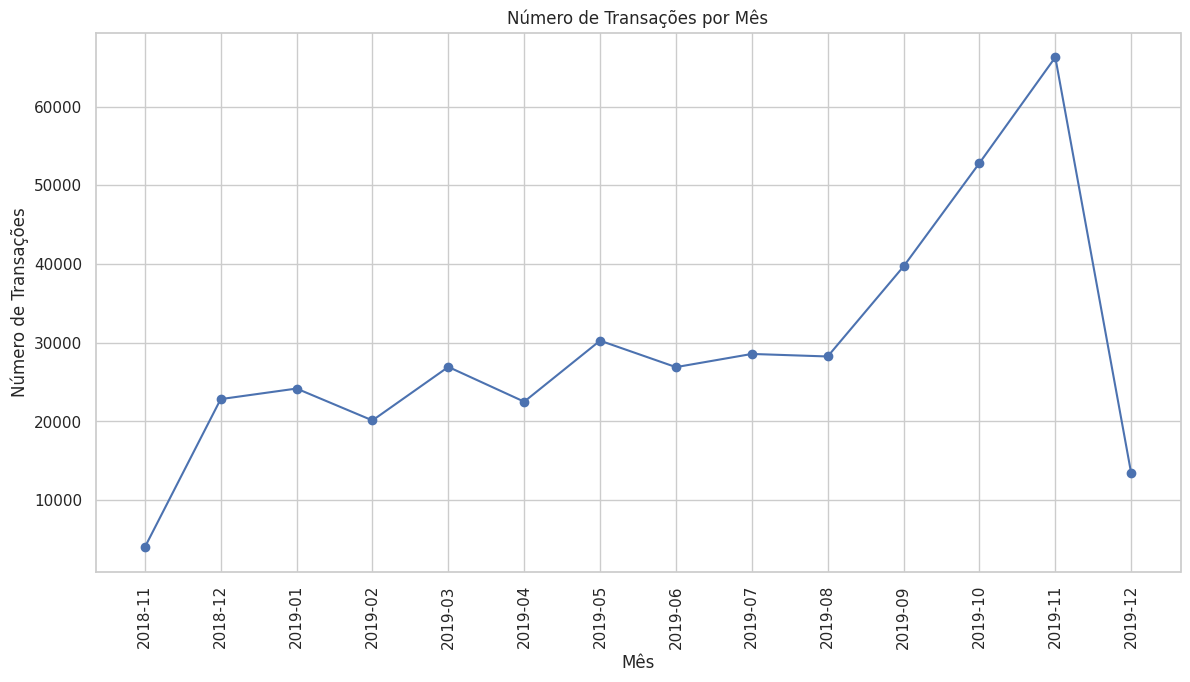

In [ ]:
# número de transações por mês
plt.figure(figsize=(14, 7))
plt.plot(monthly_transactions.index.astype(str), monthly_transactions.values, marker='o', linestyle='-', color='b')
plt.title('Número de Transações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Transações')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

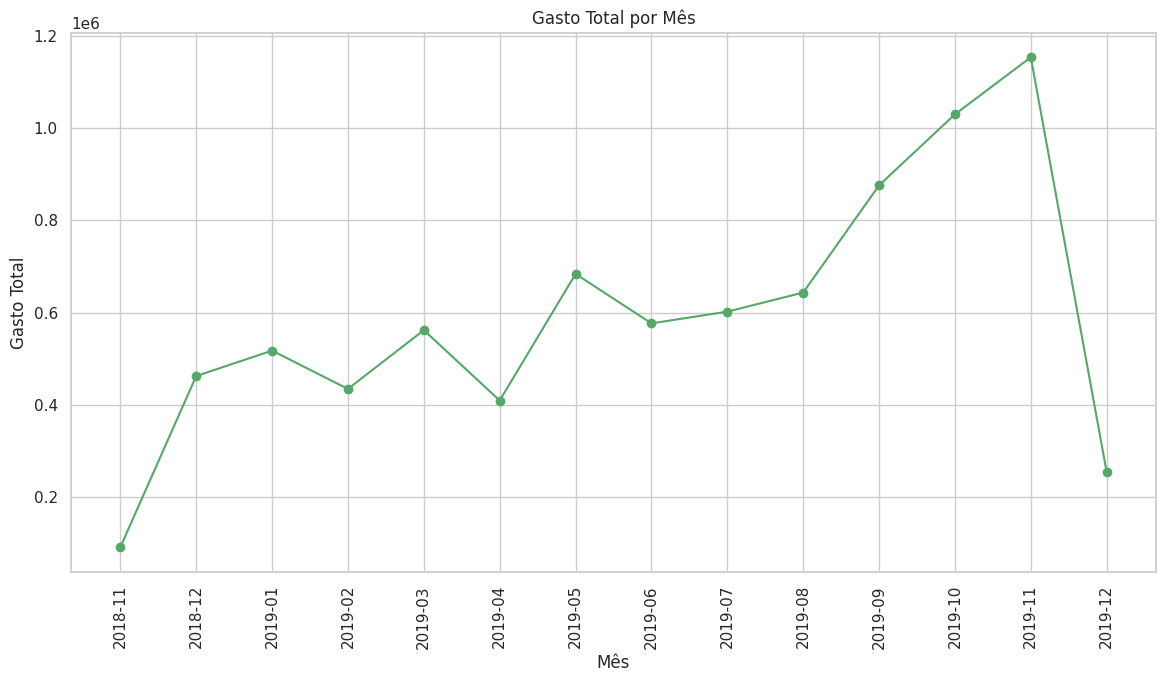

In [ ]:
# gasto total por mês
plt.figure(figsize=(14, 7))
plt.plot(monthly_spend.index.astype(str), monthly_spend.values, marker='o', linestyle='-', color='g')
plt.title('Gasto Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Gasto Total')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Categorias de produtos

**Produtos mais comprados com base na quantidade vendida**

In [ ]:
# Identificar os produtos mais comprados com base na quantidade vendida
quantity_per_product = data_clean.groupby('Description')['Quantity'].sum().reset_index()
quantity_per_product = quantity_per_product.sort_values(by='Quantity', ascending=False)

print("Produtos Mais Comprados com Base na Quantidade Vendida:")
print(quantity_per_product.head(10))

Produtos Mais Comprados com Base na Quantidade Vendida:
                             Description  Quantity
3805   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
1771             JUMBO BAG RED RETROSPOT     45066
217        ASSORTED COLOUR BIRD ORNAMENT     35314
3716  WHITE HANGING HEART T-LIGHT HOLDER     34147
2279     PACK OF 72 RETROSPOT CAKE CASES     33409
2612                      POPCORN HOLDER     30504
2669                  RABBIT NIGHT LIGHT     27094
2057             MINI PAINT SET VINTAGE      25880
2245          PACK OF 12 LONDON TISSUES      25321
2277  PACK OF 60 PINK PAISLEY CAKE CASES     24163


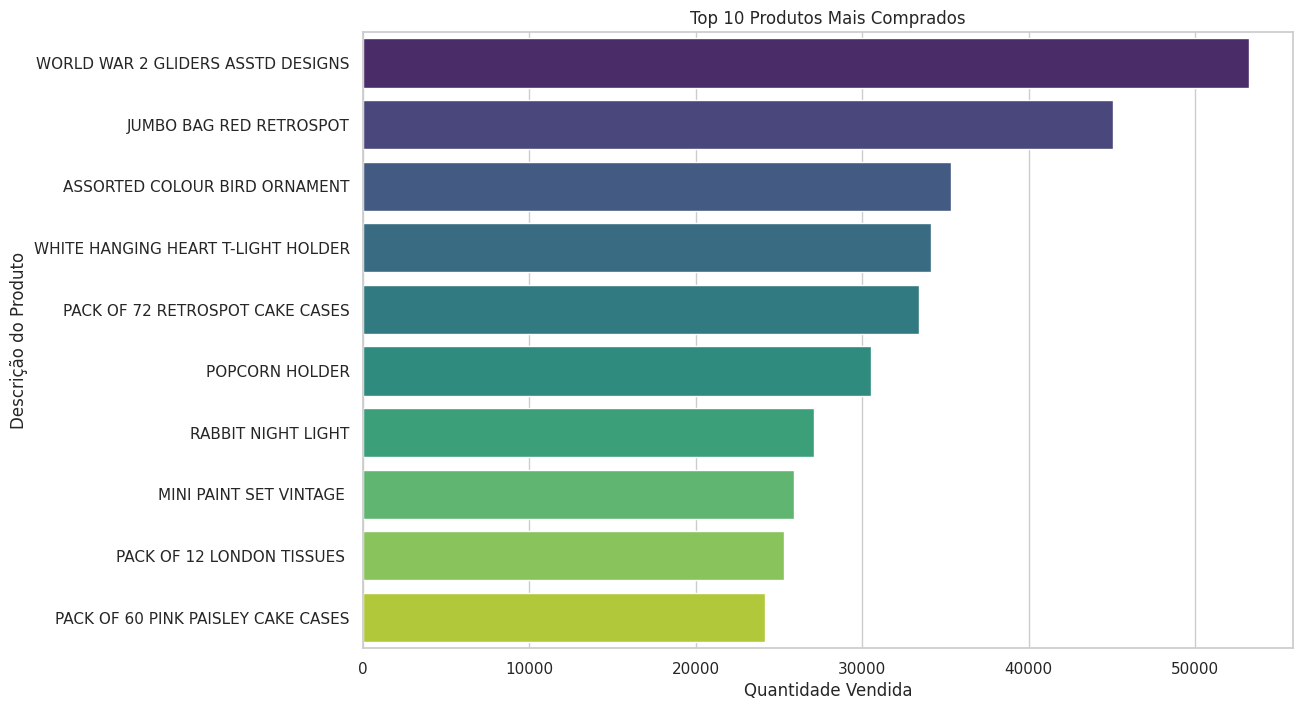

In [ ]:
#  plot de produtos mais comprados
plt.figure(figsize=(12, 8))
sns.barplot(data=quantity_per_product.head(10), x='Quantity', y='Description', palette='viridis')
plt.title('Top 10 Produtos Mais Comprados')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Descrição do Produto')
plt.show()

*Estes produtos destacam-se por terem o maior volume de vendas, indicando uma alta demanda ou popularidade entre os clientes. O "WORLD WAR 2 GLIDERS ASSTD DESIGNS" lidera a lista com a maior quantidade vendida, seguido por itens como o "JUMBO BAG RED RETROSPOT" e o "ASSORTED COLOUR BIRD ORNAMENT".*

**Produtos que geram mais receita total**

In [ ]:
# produtos geraram mais receita total
revenue_per_product = data_clean.groupby('Description')['TotalSpend'].sum().reset_index()
revenue_per_product = revenue_per_product.sort_values(by='TotalSpend', ascending=False)

print("\nProdutos que Geraram Mais Receita Total:")
print(revenue_per_product.head(10))



Produtos que Geraram Mais Receita Total:
                             Description  TotalSpend
2780            REGENCY CAKESTAND 3 TIER   132870.40
3716  WHITE HANGING HEART T-LIGHT HOLDER    93823.85
1771             JUMBO BAG RED RETROSPOT    83236.76
2355                       PARTY BUNTING    67687.53
2624                             POSTAGE    66710.24
217        ASSORTED COLOUR BIRD ORNAMENT    56499.22
2669                  RABBIT NIGHT LIGHT    51137.80
725                        CHILLI LIGHTS    45936.81
2323     PAPER CHAIN KIT 50'S CHRISTMAS     41500.48
2405      PICNIC BASKET WICKER 60 PIECES    39619.50


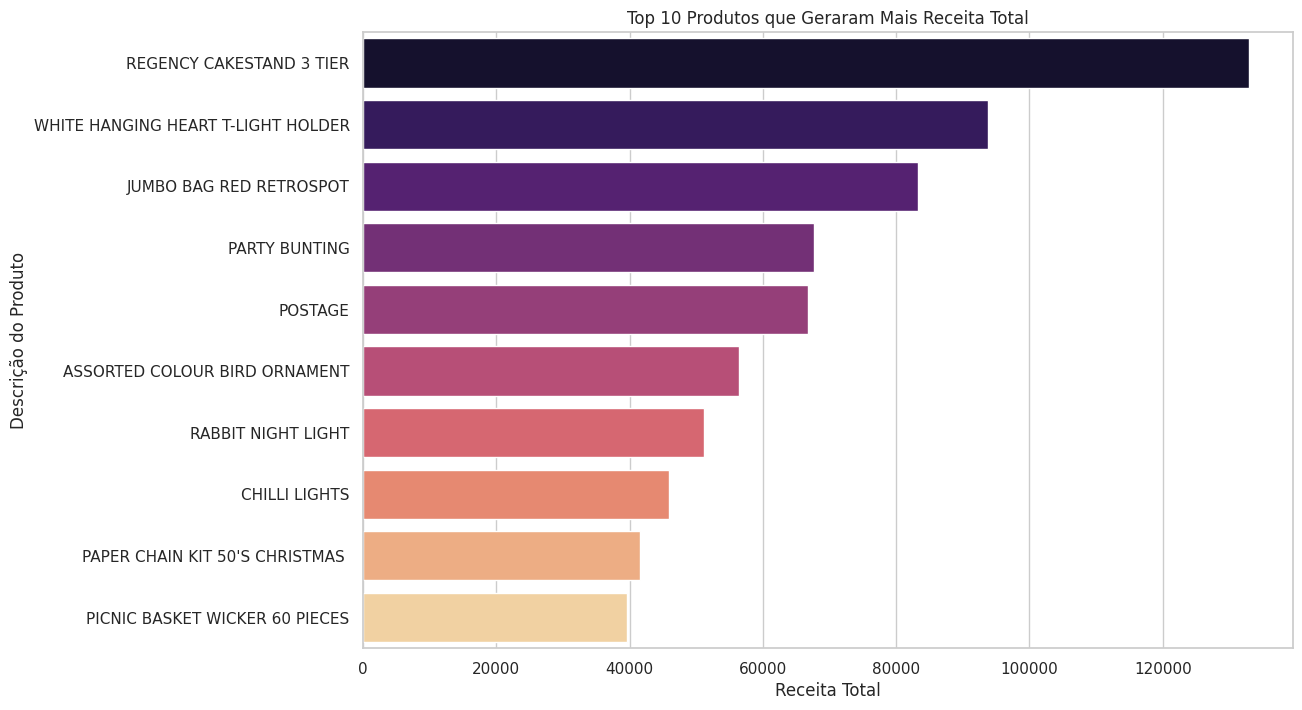

In [ ]:
# plot os produtos que geraram mais receita
plt.figure(figsize=(12, 8))
sns.barplot(data=revenue_per_product.head(10), x='TotalSpend', y='Description', palette='magma')
plt.title('Top 10 Produtos que Geraram Mais Receita Total')
plt.xlabel('Receita Total')
plt.ylabel('Descrição do Produto')
plt.show()

*Esses produtos são os principais responsáveis pela geração de receita, com o "REGENCY CAKESTAND 3 TIER" liderando o ranking. Itens como o "WHITE HANGING HEART T-LIGHT HOLDER" e o "JUMBO BAG RED RETROSPOT" também contribuíram significativamente para o faturamento. A receita total indica a importância desses produtos nas vendas da empresa.*

# Análise RFM

In [ ]:
# data mais recente no conjunto de dados
current_date = data_clean['InvoiceDate'].max()

In [ ]:
# calculando recência, frequência e valor Monetário 
rfm = data_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # recencia
    'InvoiceNo': 'nunique',  # frequência
    'TotalSpend': 'sum'  # valor Monetário
}).reset_index()

In [ ]:
# renomeando colunas para recência, frequência e Valor Monetário
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
# pontuando os clientes em cada métrica de 1 a 5
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=False, duplicates='drop') + 1
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=False, duplicates='drop') + 1

In [ ]:
# criar uma pontuação RFM combinada
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [ ]:
# classificando os clientes em segmentos baseados nas pontuações RFM
def segment_rfm(df):
    if df['RFM_Score'] == '555':
        return 'Melhores Clientes'
    elif df['R_Score'] >= 4 and df['F_Score'] >= 4:
        return 'Clientes Leais'
    elif df['R_Score'] <= 2 and df['M_Score'] <= 2:
        return 'Clientes em Risco'
    elif df['R_Score'] >= 4:
        return 'Clientes Recentes'
    elif df['M_Score'] >= 4:
        return 'Clientes que Gastam Mais'
    else:
        return 'Outros Clientes'

rfm['Segment'] = rfm.apply(segment_rfm, axis=1)

In [ ]:
# identificar clientes que trazem menos receita
low_value_customers = rfm[rfm['Segment'] == 'Clientes em Risco']

In [ ]:
# exibindo sumário RFM
print("Sumário RFM:")
print(rfm.head())


Sumário RFM:
   CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0     12346.0      325          2      0.00        5        1        1   
1     12347.0        1          7   4310.00        1        3        5   
2     12348.0       74          4   1797.24        4        2        4   
3     12349.0       18          1   1757.55        2        1        4   
4     12350.0      309          1    334.40        5        1        2   

  RFM_Score                   Segment  
0       511         Clientes Recentes  
1       135  Clientes que Gastam Mais  
2       424         Clientes Recentes  
3       214  Clientes que Gastam Mais  
4       512         Clientes Recentes  


**Interpretação:**

*Clientes Recentes: Tendem a ter uma recência mais alta e menor frequência de compras.*  
*Clientes que Gastam Mais: Mostram maior gasto monetário e podem ter uma recência mais baixa.*

In [ ]:
# exibindo clientes que trazem menos receita
print("\nClientes que trazem menos receita:")
print(low_value_customers)


Clientes que trazem menos receita:
      CustomerID  Recency  Frequency      Monetary  R_Score  F_Score  M_Score  \
19       12367.0        3          1  1.689000e+02        1        1        1   
25       12375.0        2          3  4.554200e+02        1        2        2   
36       12391.0       21          1  4.608900e+02        2        1        2   
78       12442.0        2          1  1.720600e+02        1        1        1   
80       12445.0       21          1  1.334000e+02        2        1        1   
...          ...      ...        ...           ...      ...      ...      ...   
4345     18249.0       16          1  9.534000e+01        2        1        1   
4362     18273.0        1          3  2.040000e+02        1        2        1   
4363     18274.0       17          2  1.243450e-14        2        1        1   
4364     18276.0       20          3  3.233600e+02        2        2        2   
4369     18282.0        7          3  1.766000e+02        1        2     

**Interpretação:**

**Recência:** *Clientes com valores baixos de recência ainda podem ter baixo valor monetário, indicando que a frequência não é suficiente para gerar receita significativa.*  
**Frequência:** *Clientes com baixa frequência de compras são menos engajados e, portanto, contribuem menos para a receita total.*  
**Monetário:** *O gasto total baixo desses clientes reflete diretamente em sua baixa receita para a empresa.*

**Visualizar a distribuição das pontuações RFM**

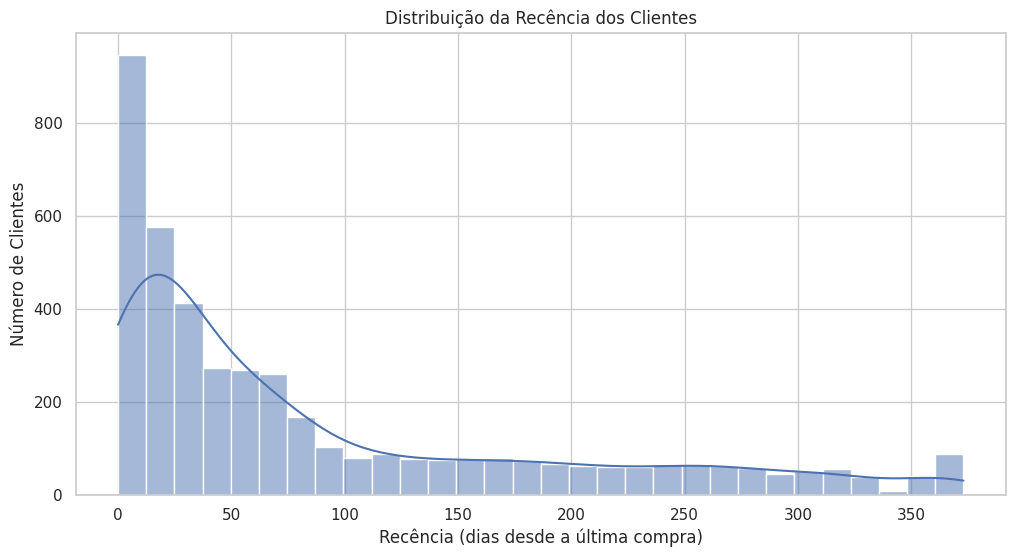

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm['Recency'], kde=True, bins=30)
plt.title('Distribuição da Recência dos Clientes')
plt.xlabel('Recência (dias desde a última compra)')
plt.ylabel('Número de Clientes')
plt.show()


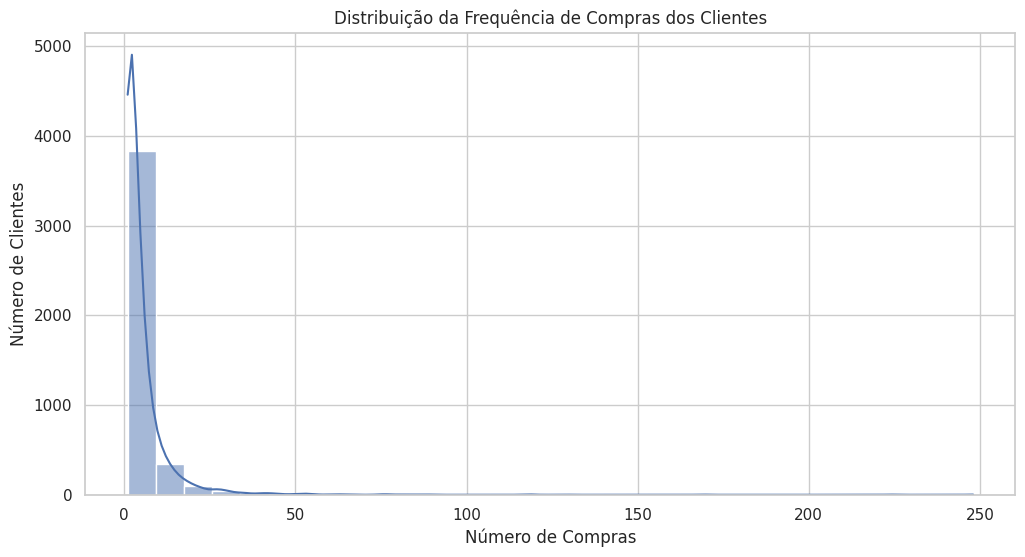

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm['Frequency'], kde=True, bins=30)
plt.title('Distribuição da Frequência de Compras dos Clientes')
plt.xlabel('Número de Compras')
plt.ylabel('Número de Clientes')
plt.show()

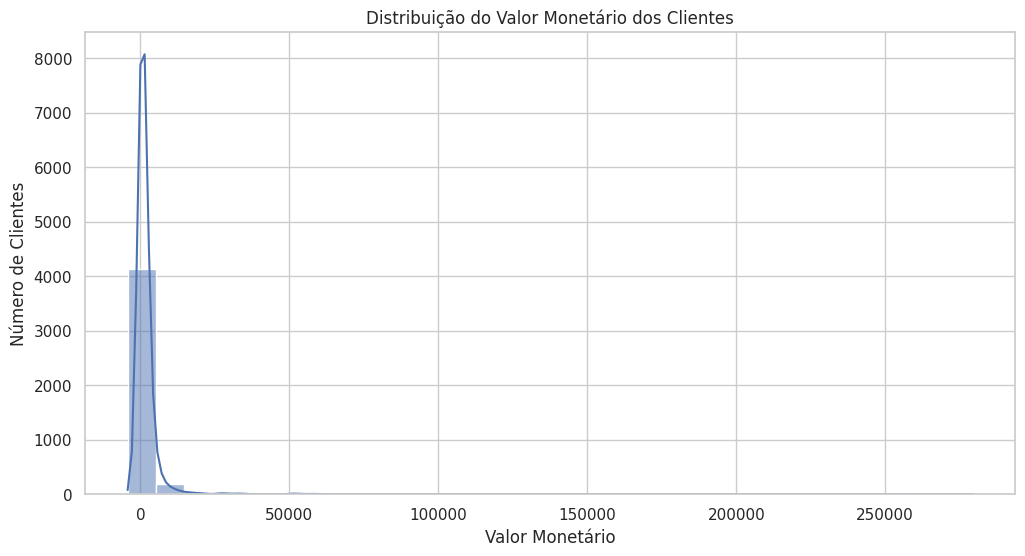

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm['Monetary'], kde=True, bins=30)
plt.title('Distribuição do Valor Monetário dos Clientes')
plt.xlabel('Valor Monetário')
plt.ylabel('Número de Clientes')
plt.show()

**Visualizar a distribuição dos segmentos**

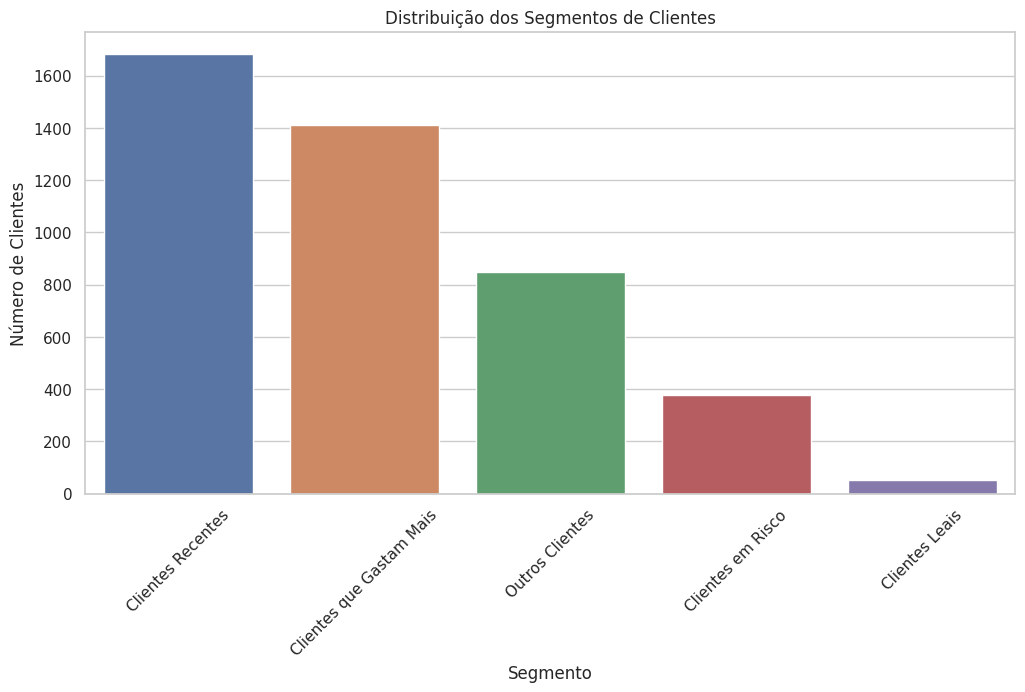

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Distribuição dos Segmentos de Clientes')
plt.xlabel('Segmento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

# Hipóteses

**Clientes que compram em volumes maiores (quantidade total) tendem a ter uma maior frequência de compras.**

Hipótese 1:
   Monetary  Frequency
0      0.00          2
1   4310.00          7
2   1797.24          4
3   1757.55          1
4    334.40          1
Coeficiente de Correlação de Pearson: 0.57
Valor-p: 0.0000
A correlação entre o valor monetário e a frequência de compras é estatisticamente significativa.


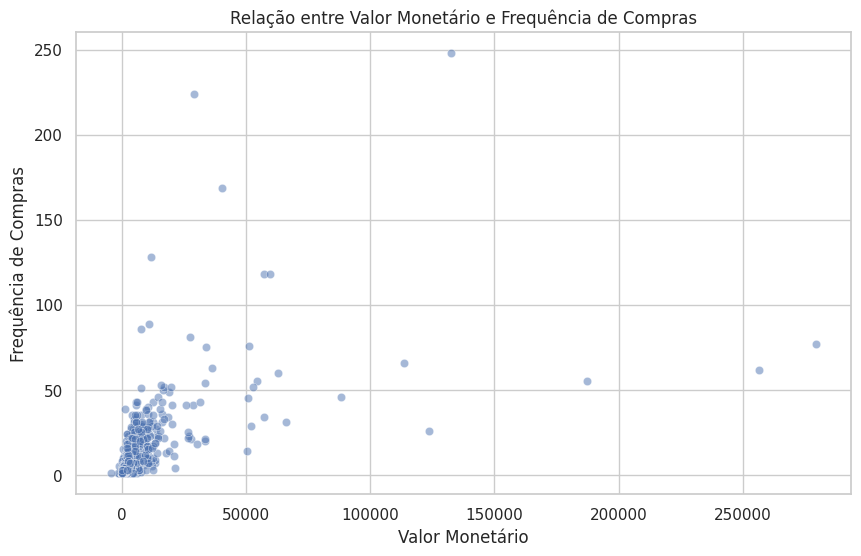

In [ ]:
# Hipótese 1
data_hypothesis_1 = rfm[['Monetary', 'Frequency']].dropna()

print("Hipótese 1:")
print(data_hypothesis_1.head())

# correlação de Pearson
correlation, p_value = pearsonr(data_hypothesis_1['Monetary'], data_hypothesis_1['Frequency'])

print(f'Coeficiente de Correlação de Pearson: {correlation:.2f}')
print(f'Valor-p: {p_value:.4f}')

# correlação é estatisticamente significativa
if p_value < 0.05:
    print("A correlação entre o valor monetário e a frequência de compras é estatisticamente significativa.")
else:
    print("A correlação entre o valor monetário e a frequência de compras não é estatisticamente significativa.")



# plot frequência de compras e valor monetário
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_hypothesis_1, x='Monetary', y='Frequency', alpha=0.5)
plt.title('Relação entre Valor Monetário e Frequência de Compras')
plt.xlabel('Valor Monetário')
plt.ylabel('Frequência de Compras')
plt.show()


*A análise confirma que há uma relação positiva significativa entre o valor monetário gasto e a frequência de compras. Clientes que gastam mais frequentemente tendem a realizar compras com maior frequência. Esse resultado é consistente com a hipótese de que maiores volumes de compra estão associados a uma maior frequência de compras.*

**Clientes que gastam mais têm uma menor recência, indicando maior lealdade.**

Hipótese 2:
   Monetary  Recency
0      0.00      325
1   4310.00        1
2   1797.24       74
3   1757.55       18
4    334.40      309
Coeficiente de Correlação de Pearson: -0.13
Valor-p: 0.0000
A correlação entre valor monetário e recência é estatisticamente significativa.


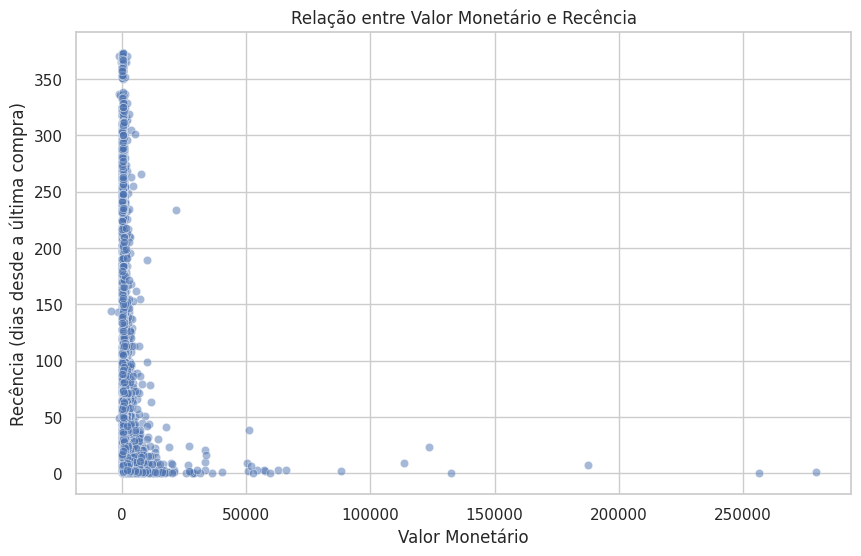

In [ ]:
# Hipótese 2
data_hypothesis_2 = rfm[['Monetary', 'Recency']].dropna()


print("Hipótese 2:")
print(data_hypothesis_2.head())

# correlação de Pearson
correlation, p_value = pearsonr(data_hypothesis_2['Monetary'], data_hypothesis_2['Recency'])

print(f"Coeficiente de Correlação de Pearson: {correlation:.2f}")
print(f"Valor-p: {p_value:.4f}")

# resultado
if p_value < 0.05:
    print("A correlação entre valor monetário e recência é estatisticamente significativa.")
else:
    print("A correlação entre valor monetário e recência não é estatisticamente significativa.")

# plot relação entre valor monetário e recência
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_hypothesis_2, x='Monetary', y='Recency', alpha=0.5)
plt.title('Relação entre Valor Monetário e Recência')
plt.xlabel('Valor Monetário')
plt.ylabel('Recência (dias desde a última compra)')
plt.show()


*Os dados mostram uma correlação de Pearson de -0.13 entre o valor monetário e a recência, com um valor-p de 0.0000. Isso significa que há uma correlação negativa, embora pequena, entre o valor gasto e o tempo desde a última compra. A correlação é estatisticamente significativa, sugerindo que, em média, clientes que gastam mais tendem a ter uma recência menor, o que pode indicar maior lealdade.*

**Clientes que compram mais frequentemente têm um valor monetário médio mais alto.**

Hipótese 3:
   Frequency  Monetary
0          2      0.00
1          7   4310.00
2          4   1797.24
3          1   1757.55
4          1    334.40
Coeficiente de Correlação de Pearson: 0.57
Valor-p: 0.0000
A correlação entre frequência de compras e valor monetário é estatisticamente significativa.


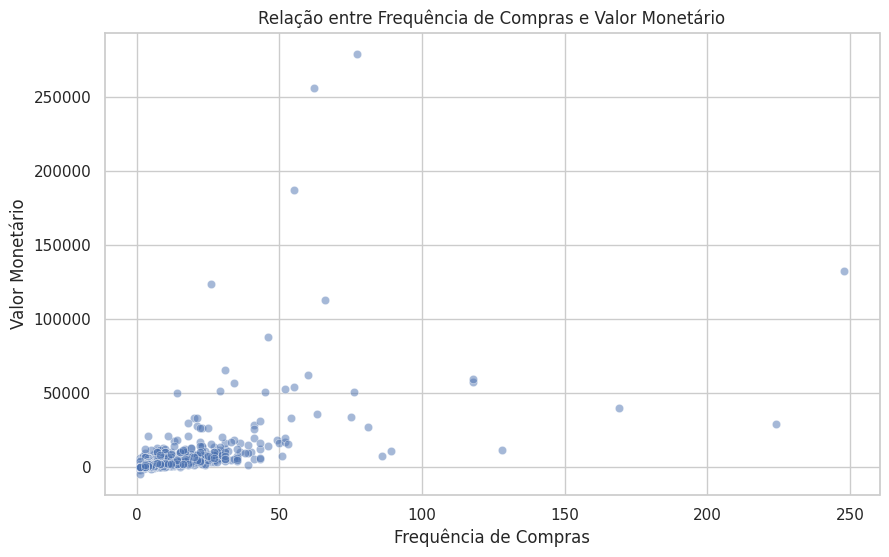

In [ ]:
# Hipótese 3
data_hypothesis_3 = rfm[['Frequency', 'Monetary']].dropna()


print("Hipótese 3:")
print(data_hypothesis_3.head())

# correlação de Pearson
correlation, p_value = pearsonr(data_hypothesis_3['Frequency'], data_hypothesis_3['Monetary'])

print(f"Coeficiente de Correlação de Pearson: {correlation:.2f}")
print(f"Valor-p: {p_value:.4f}")

# resultado
if p_value < 0.05:
    print("A correlação entre frequência de compras e valor monetário é estatisticamente significativa.")
else:
    print("A correlação entre frequência de compras e valor monetário não é estatisticamente significativa.")


# plot relação entre frequência de compras e valor monetário
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_hypothesis_3, x='Frequency', y='Monetary', alpha=0.5)
plt.title('Relação entre Frequência de Compras e Valor Monetário')
plt.xlabel('Frequência de Compras')
plt.ylabel('Valor Monetário')
plt.show()


*O relacionamento entre a frequência de compras e o valor monetário mostra que clientes que compram com mais frequência tendem a gastar mais em média. O coeficiente de correlação de Pearson é de 0.57, indicando uma correlação positiva moderada entre a frequência de compras e o valor gasto. O valor-p é 0.0000, o que confirma que essa correlação é estatisticamente significativa.*

**Clientes com alta frequência de compras e baixo tempo desde a última compra tendem a gastar mais em cada compra individualmente**

Dados para a Hipótese 4:
   Frequency  Recency  Monetary  Monetary_per_Transaction
0          2      325      0.00                  0.000000
1          7        1   4310.00                615.714286
2          4       74   1797.24                449.310000
3          1       18   1757.55               1757.550000
4          1      309    334.40                334.400000
Coeficiente de Correlação de Pearson: 0.09
Valor-p: 0.0000
A correlação entre a frequência de compras e o valor monetário por transação é estatisticamente significativa.


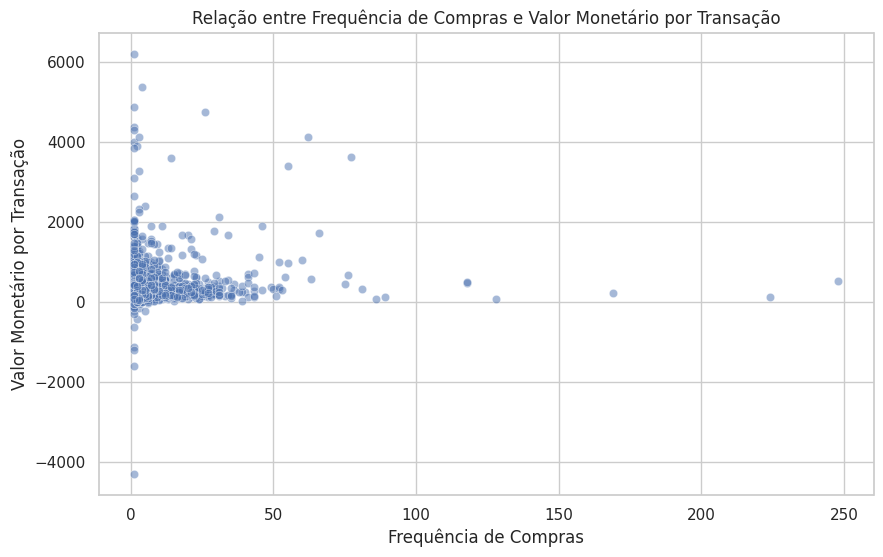

In [ ]:
# Hipótese 4
data_hypothesis_4 = rfm[['Frequency', 'Recency', 'Monetary']].dropna()

# nova coluna para o valor monetário médio por compra
data_hypothesis_4['Monetary_per_Transaction'] = data_hypothesis_4['Monetary'] / data_hypothesis_4['Frequency']

print("Dados para a Hipótese 4:")
print(data_hypothesis_4.head())

#  correlação de Pearson entre frequência de compras e valor monetário por transação
correlation, p_value = pearsonr(data_hypothesis_4['Frequency'], data_hypothesis_4['Monetary_per_Transaction'])

print(f"Coeficiente de Correlação de Pearson: {correlation:.2f}")
print(f"Valor-p: {p_value:.4f}")

# resultado
if p_value < 0.05:
    print("A correlação entre a frequência de compras e o valor monetário por transação é estatisticamente significativa.")
else:
    print("A correlação entre a frequência de compras e o valor monetário por transação não é estatisticamente significativa.")

# plot relação entre frequência de compras e valor monetário por transação
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_hypothesis_4, x='Frequency', y='Monetary_per_Transaction', alpha=0.5)
plt.title('Relação entre Frequência de Compras e Valor Monetário por Transação')
plt.xlabel('Frequência de Compras')
plt.ylabel('Valor Monetário por Transação')
plt.show()


*Apesar de a correlação ser estatisticamente significativa, o coeficiente de correlação muito baixo sugere que a relação entre a frequência de compras e o valor monetário por transação é quase inexistente. Portanto, não há evidências fortes para apoiar a hipótese de que clientes com alta frequência de compras e baixa recência tendem a gastar mais por transação.*